In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [10]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [11]:
# # Assign the classes to  variables
#Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.measurement


In [12]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [13]:
### Precipitation Analysis
#You must use SQLAlchemy ORM to query the provided sqlite database for this homework.

#Retrieve the average daily temperature for the first available year in the database.
#There are more than one temperature readings for each date. Be sure to calculate the average (use func.avg) over these observations so you have a single temperature for each date (tobs).

#Notes - use %Y to filter the first year (2010) with strftime (a way to format date and time)
#I just looked at csv to see what the first available year was, not sure if I was supposed to do something else with that?


first_yr_avg_temp = session.query(func.avg(Measurement.tobs), Measurement.date).\
    filter(func.strftime("%Y", Measurement.date) == "2010").\
    group_by(Measurement.date).all()
                    
first_yr_avg_temp

[(69.71428571428571, '2010-01-01'),
 (67.0, '2010-01-02'),
 (74.0, '2010-01-03'),
 (75.0, '2010-01-04'),
 (74.5, '2010-01-05'),
 (73.33333333333333, '2010-01-06'),
 (70.42857142857143, '2010-01-07'),
 (65.57142857142857, '2010-01-08'),
 (68.57142857142857, '2010-01-09'),
 (72.71428571428571, '2010-01-10'),
 (66.71428571428571, '2010-01-11'),
 (61.57142857142857, '2010-01-12'),
 (61.5, '2010-01-13'),
 (66.42857142857143, '2010-01-14'),
 (64.83333333333333, '2010-01-15'),
 (67.33333333333333, '2010-01-16'),
 (68.0, '2010-01-17'),
 (73.0, '2010-01-18'),
 (69.42857142857143, '2010-01-19'),
 (67.85714285714286, '2010-01-20'),
 (69.5, '2010-01-21'),
 (63.5, '2010-01-22'),
 (73.83333333333333, '2010-01-23'),
 (73.16666666666667, '2010-01-24'),
 (67.14285714285714, '2010-01-25'),
 (74.71428571428571, '2010-01-26'),
 (68.71428571428571, '2010-01-27'),
 (69.83333333333333, '2010-01-28'),
 (65.8, '2010-01-29'),
 (70.5, '2010-01-30'),
 (71.5, '2010-01-31'),
 (66.5, '2010-02-01'),
 (66.833333333333

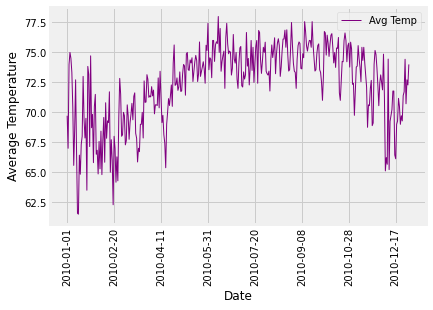

In [14]:
#Using pandas or matplotlib, create a well-designed line chart with this information.

 
first_yr_avg_temp_df = pd.DataFrame(first_yr_avg_temp, columns = ['Average', 'Date'])
first_yr_avg_temp_df.head()

first_yr_avg_temp_df.plot.line(x = 'Date', label = 'Date', y = 'Average', ylabel = 'Average Temperature', linewidth=1, color = 'purple')
plt.xticks(rotation=90)
plt.legend(['Avg Temp'])


In [15]:
### Station Analysis

#Query the database for a list station, name, and total number of observations over all available dates. 
#Sort this list by total number of observations in descending order.

query_list = session.query(Station.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
                    
query_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
#Retrieve the precipitation readings for the most active station 
#(i.e., the one with the greatest number of observations) in the year 2016.

precip = session.query(Measurement.prcp).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime("%Y", Measurement.date) == "2016").all()
precip

[(0.02),
 (0.03),
 (0.0),
 (0.0),
 (0.18),
 (0.35),
 (0.35),
 (0.02),
 (0.02),
 (0.02),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.02),
 (0.05),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.42),
 (0.0),
 (0.0),
 (0.0),
 (0.07),
 (0.74),
 (0.01),
 (0.0),
 (0.02),
 (0.01),
 (0.02),
 (0.07),
 (0.42),
 (0.2),
 (0.04),
 (0.0),
 (0.0),
 (0.05),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.22),
 (0.0),
 (0.0),
 (0.03),
 (0.11),
 (0.02),
 (0.0),
 (0.06),
 (0.08),
 (0.04),
 (0.0),
 (0.0),
 (0.0),
 (0.3),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.34),
 (0.01),
 (0.02),
 (0.0),
 (0.03),
 (0.03),
 (0.82),
 (0.23),
 (0.01),
 (0.08),
 (0.16),
 (0.0),
 (0.0),
 (0.1),
 (0.31),
 (0.0),
 (0.38),
 (0.06),
 (0.08),
 (0.0),
 (0.02),
 (0.04),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.34),
 (0.43),
 (1.26),
 (0.27),
 (0.11),
 (0.05),
 (0.11),
 (0.04),
 (0.05),
 (0.01),
 (0.06),
 (0.32),
 (0.83),
 (0.18),
 (0.06),
 (0.0),
 (0.07),
 (0.23),
 (0.21),
 (0.03),
 (0.

<AxesSubplot:ylabel='Frequency'>

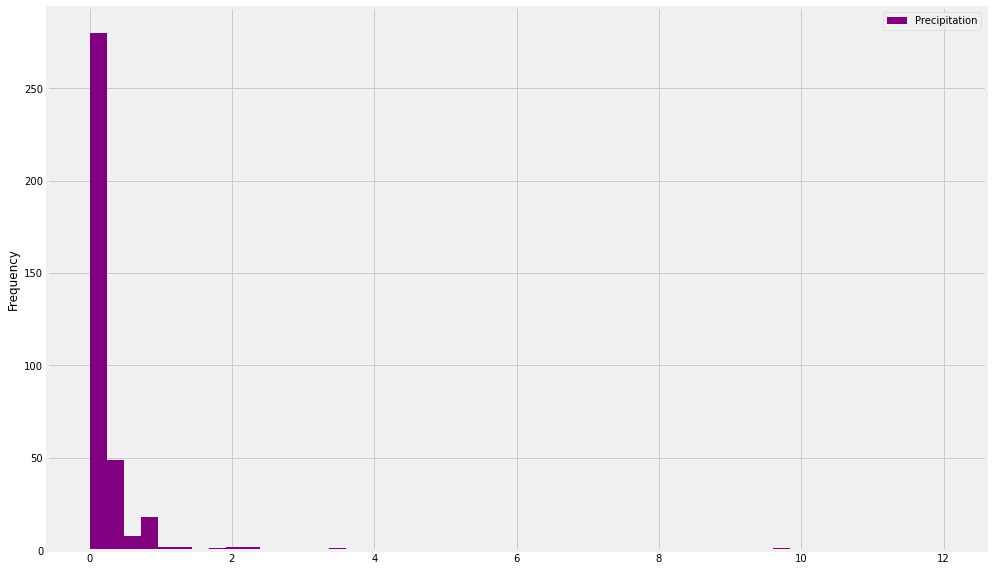

In [42]:
#Using pandas or matplotlib, create a well-designed histogram with this information.

precip_df = pd.DataFrame(precip, columns = ['Precipitation'])
precip_df.head()

precip_df.plot.hist(bins =50, range = [0, 12], figsize =(15,10), color = 'purple')
